In [2]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image #
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt

#from google.colab import drive # 구글드라이브 연결 라이브러리

In [3]:
#drive.mount('/content/drive') #구글 드라이브 연결

In [4]:
torch.manual_seed(777)
IMAGE_SIZE=128

device='cuda' if torch.cuda.is_available() else 'cpu'
if device=='cuda':
    torch.cuda.manual_seed_all(777)

In [5]:
original_datasets=ImageFolder(root='flower_photos/',
                              transform=transforms.Compose([
                                  transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                  transforms.ToTensor()
                              ]))

In [6]:
print(original_datasets)

Dataset ImageFolder
    Number of datapoints: 2313
    Root location: flower_photos/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [7]:
original_loader=DataLoader(original_datasets,
                           batch_size=2313,
                           shuffle=True,
                           drop_last=False,
                           num_workers=1) # 데이터 로시드 사용할 병렬 프로세스 수, 단일 프로세스 사용

In [8]:
for X, Y in original_loader:
    print(X.size(), Y.size())
    print(Y)
    break

torch.Size([2313, 3, 128, 128]) torch.Size([2313])
tensor([3, 0, 4,  ..., 4, 3, 2])


In [9]:
# 이미지 로더로 부터 이미지와 label을 추출
#total_batch=len(original_loader)
#print(total_batch)
#for i in range(total_batch):
original_images, labels=next(iter(original_loader))
print(original_images.shape)
print(labels.shape)

1
torch.Size([2313, 3, 128, 128])
torch.Size([2313])


In [10]:
print(labels[:10])

tensor([1, 3, 3, 0, 1, 3, 2, 2, 4, 3])


In [12]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt

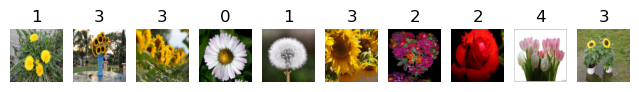

In [13]:
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(labels[i].item())
    plt.imshow(original_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [14]:
Image_transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

In [16]:
transforms_datasets=ImageFolder(root='flower_photos/',
                                transform=Image_transform)
transforms_loader=DataLoader(transforms_datasets,
                             batch_size=100, 
                             shuffle=False,
                             num_workers=1)

In [17]:
transforms_images, transforms_labels=next(iter(transforms_loader))

In [18]:
none_datasets=ImageFolder(root='flower_photos/',
                                transform=transforms.Compose([
                                  transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                  transforms.ToTensor()
                                  ]))
none_loader=DataLoader(transforms_datasets,
                             batch_size=100, 
                             shuffle=False,
                             num_workers=1)